#Gold & Silver Price prediction using Arima

In [2]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [3]:
#Necessary libraries = Pandas, matplotlib

#pandas= data Manipulation and analysis
#Arima = Forecasting
#matplotlib= data visualization


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 7.6 MB/s 
     |████████████████████████████████| 9.5 MB 44.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset & Exploring it

In [6]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 12.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=0e3d850f1756b466b3544e4e347adaf3a4e654f1cf5456405055dbf1b83e2998
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [7]:
import yfinance as yf

data = yf.download("GC=F", start="2017-01-01", end="2021-04-30")

[*********************100%***********************]  1 of 1 completed


In [8]:
df=pd.DataFrame(data)

In [9]:
#read_csv function from pandas

In [44]:
df.reset_index(inplace=True)
df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-01-03,1155.199951,1160.800049,1146.500000,1160.400024,1160.400024,52
1,1,2017-01-04,1156.300049,1165.000000,1156.300049,1163.800049,1163.800049,36
2,2,2017-01-05,1172.000000,1183.300049,1171.500000,1179.699951,1179.699951,500
3,3,2017-01-06,1176.500000,1176.500000,1171.900024,1171.900024,1171.900024,16
4,4,2017-01-09,1173.900024,1183.599976,1173.000000,1183.500000,1183.500000,62
...,...,...,...,...,...,...,...,...
1072,1072,2021-04-23,1786.099976,1794.500000,1772.000000,1777.000000,1777.000000,332
1073,1073,2021-04-26,1778.000000,1779.699951,1770.800049,1779.199951,1779.199951,549
1074,1074,2021-04-27,1780.000000,1782.000000,1777.699951,1778.000000,1778.000000,117
1075,1075,2021-04-28,1768.199951,1774.000000,1764.599976,1773.199951,1773.199951,756


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      1077 non-null   int64         
 1   Date       1077 non-null   datetime64[ns]
 2   Open       1077 non-null   float64       
 3   High       1077 non-null   float64       
 4   Low        1077 non-null   float64       
 5   Close      1077 non-null   float64       
 6   Adj Close  1077 non-null   float64       
 7   Volume     1077 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 67.4 KB


In [46]:
df.describe()

,index,Open,High,Low,Close,Adj Close,Volume
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,538.000000,1450.634540,1457.142063,1443.993408,1450.649582,1450.649582,6198.126277
std,311.047424,239.665495,242.825414,236.379627,239.593823,239.593823,34700.290438
min,0.000000,1155.199951,1160.800049,1146.500000,1160.400024,1160.400024,0.000000
25%,269.000000,1267.599976,1270.800049,1262.199951,1267.400024,1267.400024,31.000000
50%,538.000000,1324.000000,1328.000000,1320.500000,1324.199951,1324.199951,147.000000
75%,807.000000,1662.699951,1685.500000,1647.199951,1665.400024,1665.400024,521.000000
max,1076.000000,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,386334.000000


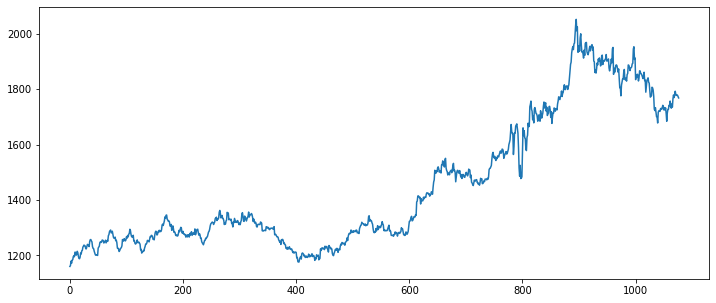

In [47]:
df['Close'].plot(figsize=(12,5))

In [48]:
df.dropna()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-01-03,1155.199951,1160.800049,1146.500000,1160.400024,1160.400024,52
1,1,2017-01-04,1156.300049,1165.000000,1156.300049,1163.800049,1163.800049,36
2,2,2017-01-05,1172.000000,1183.300049,1171.500000,1179.699951,1179.699951,500
3,3,2017-01-06,1176.500000,1176.500000,1171.900024,1171.900024,1171.900024,16
4,4,2017-01-09,1173.900024,1183.599976,1173.000000,1183.500000,1183.500000,62
...,...,...,...,...,...,...,...,...
1072,1072,2021-04-23,1786.099976,1794.500000,1772.000000,1777.000000,1777.000000,332
1073,1073,2021-04-26,1778.000000,1779.699951,1770.800049,1779.199951,1779.199951,549
1074,1074,2021-04-27,1780.000000,1782.000000,1777.699951,1778.000000,1778.000000,117
1075,1075,2021-04-28,1768.199951,1774.000000,1764.599976,1773.199951,1773.199951,756


In [49]:
columns=['Close']

In [50]:
dfn=pd.DataFrame(df,columns=columns)

In [51]:
dfn



,Close
0,1160.400024
1,1163.800049
2,1179.699951
3,1171.900024
4,1183.500000
...,...
1072,1777.000000
1073,1779.199951
1074,1778.000000
1075,1773.199951


In [52]:
train,test=dfn[0:int(len(dfn)*0.80)],dfn[int(len(dfn)*0.80):]

In [53]:
train.shape

(861, 1)

In [54]:
test.shape

(216, 1)

In [55]:
dfn.shape

(1077, 1)

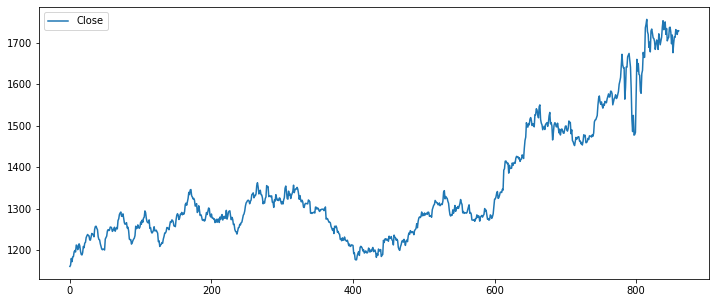

In [56]:
train.plot(figsize=(12,5))

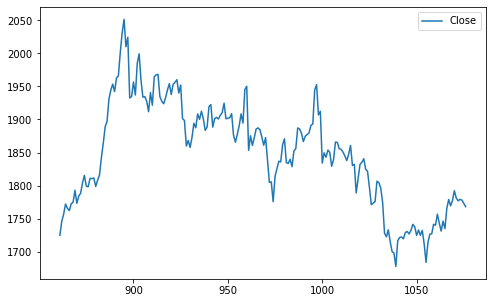

In [57]:
test.plot(figsize=(8,5))

# Understanding Auto Regressive Integrated Moving Average (ARIMA)

#Finding Order (P,D,Q)

In [24]:
!pip install pmdarima

In [58]:
from pmdarima import auto_arima
best_order=auto_arima(df['Close'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8834.283, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8832.882, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8834.196, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8834.251, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8832.482, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.587 seconds


## Creating ARIMA Model

In [59]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
model=ARIMA(train,order=(0,1,0))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  860
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3394.493
Method:                           css   S.D. of innovations             12.530
Date:                Tue, 17 Aug 2021   AIC                           6792.987
Time:                        10:20:32   BIC                           6802.501
Sample:                             1   HQIC                          6796.629
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6614      0.427      1.548      0.122      -0.176       1.499
==============================================================================
"""

## Forecasting

In [61]:
test

,Close
861,1724.800049
862,1745.900024
863,1756.699951
864,1772.099976
865,1765.800049
...,...
1072,1777.000000
1073,1779.199951
1074,1778.000000
1075,1773.199951


861

1076

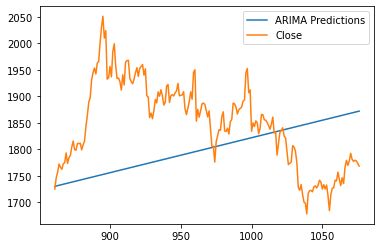

In [72]:
start=len(train)            ##Example= y1,y2,y3 > y3-y2,y2-y1 (Total elements is 3 but after using Arima its 2 > data- 1 
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Close'].plot(legend=True)



In [73]:
pred.shape

(216,)

In [74]:
test.shape

(216, 1)

### Error

In [75]:
## ERROR
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Close'].mean()
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)

118.01600834350626


##More Forecast Graphs

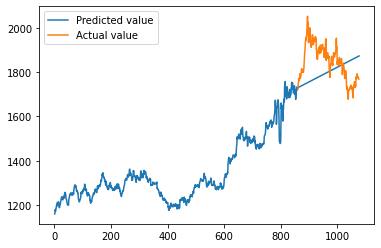

In [84]:
start=1
end=1077
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,label="Predicted value")
test['Close'].plot(legend=True ,label="Actual value")

In [81]:
pred.shape

(1077,)

In [82]:
test['Close'].shape

(216,)

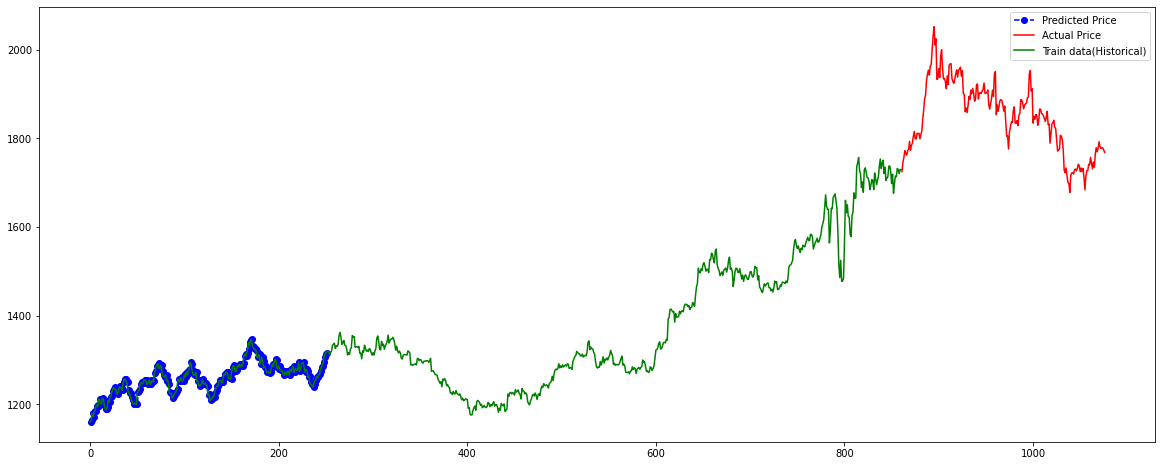

In [94]:
start=1
end=251
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price',figsize=(20,8))
test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')



In [86]:
pred.shape,test['Close'].shape,train['Close'].shape

((251,), (216,), (861,))

## X days into the future

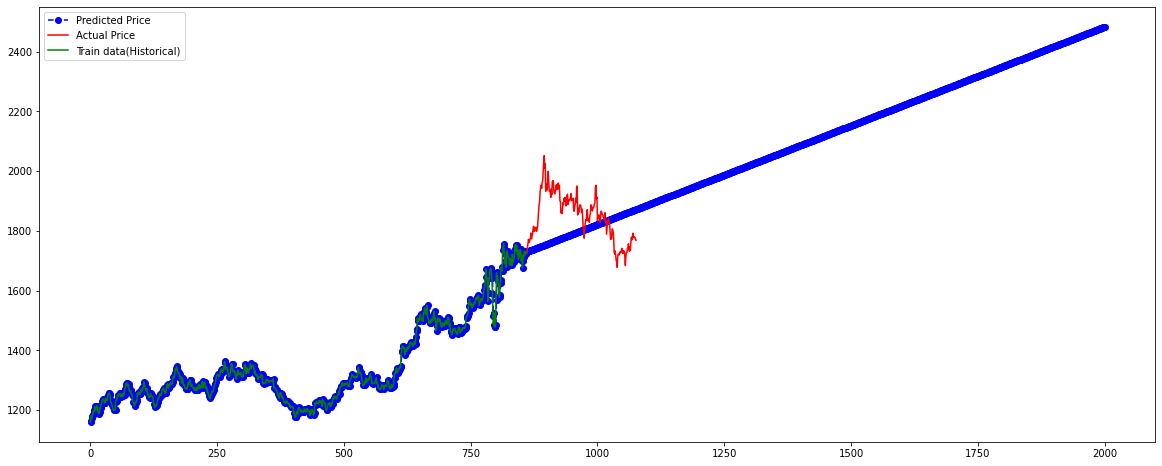

In [92]:
### 30 days into the future

start=1
end=2000
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,color='blue', marker='o', linestyle='dashed',label='Predicted Price',figsize=(20,8))
test['Close'].plot(legend=True,color='red', label='Actual Price')
train['Close'].plot(legend=True,color='green', label='Train data(Historical)')



In [93]:
pred.shape,test['Close'].shape,train['Close'].shape

((2000,), (216,), (861,))